In [2]:

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


In [3]:

# Load the dataset
file_path = "sweetspot_UT_Austin.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (55, 14)


,Well Number,Well Name,Bottomhole X,Bottomhole Y,Co [MSTB],Cw (bbl),POROS,KX,KY,TD(MD),Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
0,1,PO1_1,5064.04,13746.23,55.191600,1.617450e-04,0.128029,0.020377,0.020377,8551.7,157.119447,3,3491.971374,2992.403113
1,2,PO1_2,7668.40,13746.23,27.529400,1.394790e-04,0.101876,0.015088,0.015088,8579.9,69.831076,4,3501.327981,2947.374808
2,3,PO1_3,2459.67,13746.23,48.354000,1.973990e-04,0.119220,0.022396,0.022396,8557.1,134.781940,4,3493.763065,2904.053641
3,4,PO1_4,10272.76,13746.23,0.572057,1.440000e-07,0.064132,0.000091,0.000091,8635.5,1.101210,5,3519.775759,3301.826052
4,5,PO1_5,12877.11,13746.23,0.430394,8.560000e-08,0.063078,0.000067,0.000067,8718.6,0.435085,5,3547.347889,3365.597401


In [5]:

# Summary statistics for permeability values Kx and Ky
kx_column = 'KX'  # Adjust column name if different
ky_column = 'KY'  # Adjust column name if different

if kx_column in df.columns and ky_column in df.columns:
    print("Summary Statistics for Kx and Ky:")
    display(df[[kx_column, ky_column]].describe())
else:
    print("Error: Columns Kx and Ky not found in dataset.")


Summary Statistics for Kx and Ky:


,KX,KY
count,55.000000,55.000000
mean,0.027481,0.022876
std,0.018500,0.018372
min,0.000067,0.000067
25%,0.012782,0.006914
50%,0.027701,0.016377
75%,0.042156,0.038371
max,0.058184,0.058151


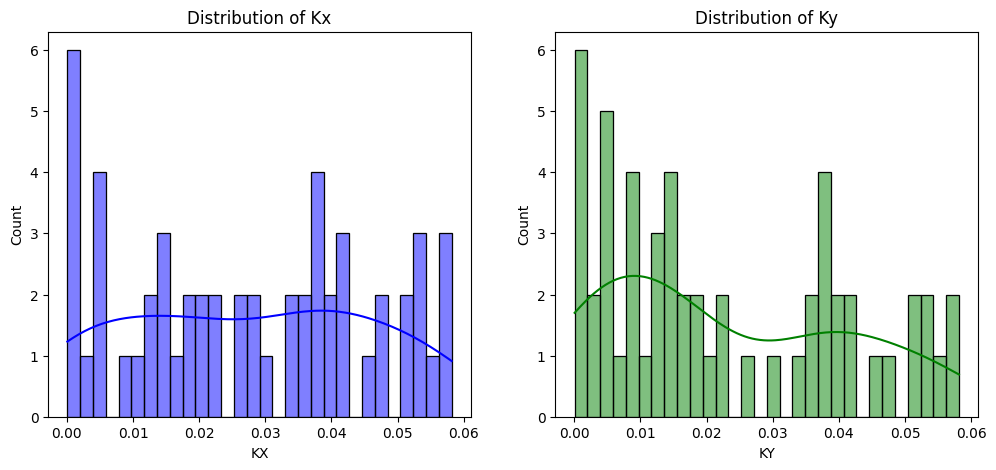

In [6]:

# Visualizing the distribution of Kx and Ky
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[kx_column].dropna(), kde=True, bins=30, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Kx")

sns.histplot(df[ky_column].dropna(), kde=True, bins=30, ax=axes[1], color="green")
axes[1].set_title("Distribution of Ky")

plt.show()


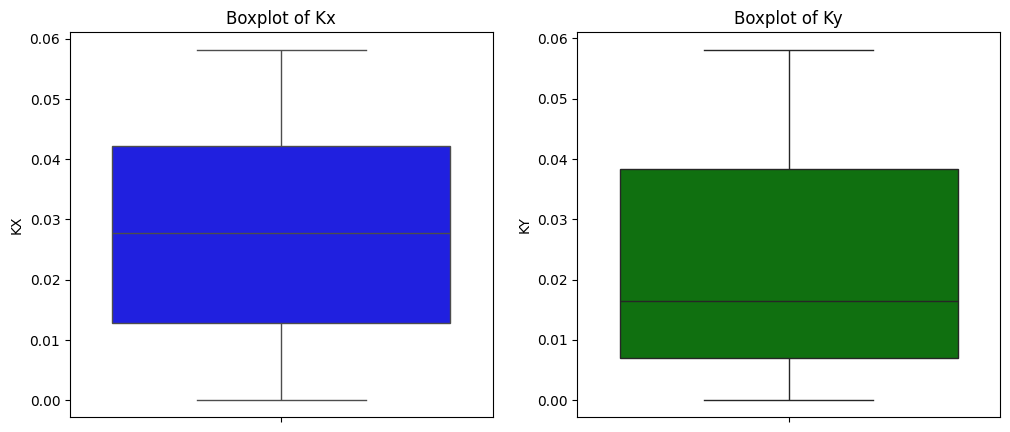

In [7]:

# Boxplots to detect outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df[kx_column].dropna(), ax=axes[0], color="blue")
axes[0].set_title("Boxplot of Kx")

sns.boxplot(y=df[ky_column].dropna(), ax=axes[1], color="green")
axes[1].set_title("Boxplot of Ky")

plt.show()


Correlation Matrix:


,KX,KY
KX,1.000000,0.842219
KY,0.842219,1.000000


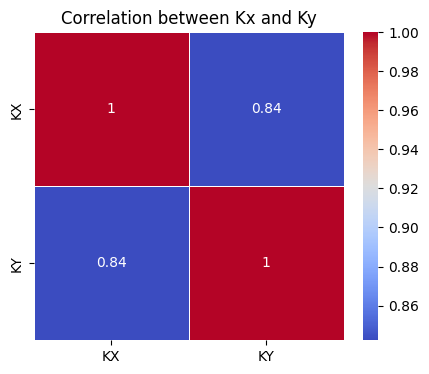

In [8]:

# Correlation between Kx and Ky
correlation = df[[kx_column, ky_column]].corr()
print("Correlation Matrix:")
display(correlation)

# Heatmap visualization
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between Kx and Ky")
plt.show()
